In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

# Download stopwords if not already
nltk.download('stopwords')

# Load your data
df = pd.read_csv("../data/processed/analyzed_reviews.csv")

# Preprocess
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation)

def clean_text(text):
    words = text.lower().split()
    return [word.strip("".join(punct)) for word in words if word not in stop_words and word.isalpha()]

# Apply cleaning
df['cleaned'] = df['review'].astype(str).apply(clean_text)

# Separate positive and negative
positive_words = df[df['sentiment'] == 'positive']['cleaned'].sum()
negative_words = df[df['sentiment'] == 'negative']['cleaned'].sum()

# Get most common
pos_common = Counter(positive_words).most_common(10)
neg_common = Counter(negative_words).most_common(10)

print("🔥 Positive Drivers:")
for word, count in pos_common:
    print(f"{word}: {count}")

print("\n⚠️ Pain Points:")
for word, count in neg_common:
    print(f"{word}: {count}")


🔥 Positive Drivers:
app: 264
good: 102
dashen: 88
best: 87
bank: 80
super: 75
banking: 71
one: 58
use: 55
easy: 54

⚠️ Pain Points:
app: 90
worst: 30
bank: 29
banking: 25
mobile: 22
even: 18
work: 16
ever: 15
fix: 15
use: 13


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


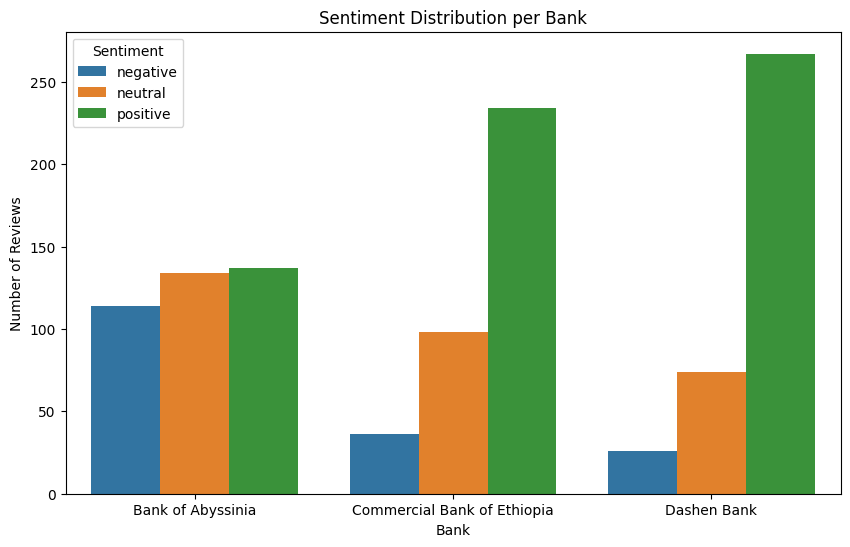

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count sentiment by bank
sentiment_counts = df.groupby(['bank', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_counts, x='bank', y='count', hue='sentiment')
plt.title('Sentiment Distribution per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()


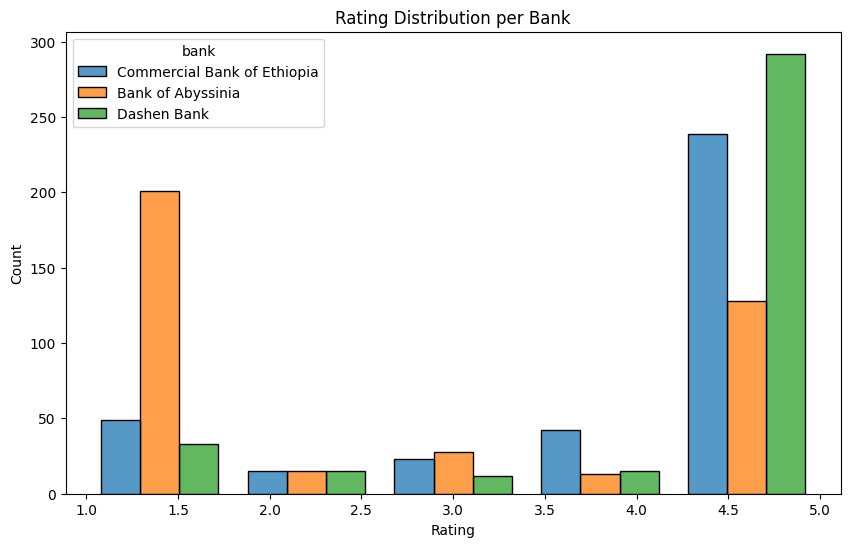

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='rating', bins=5, hue='bank', multiple='dodge', shrink=0.8)
plt.title('Rating Distribution per Bank')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


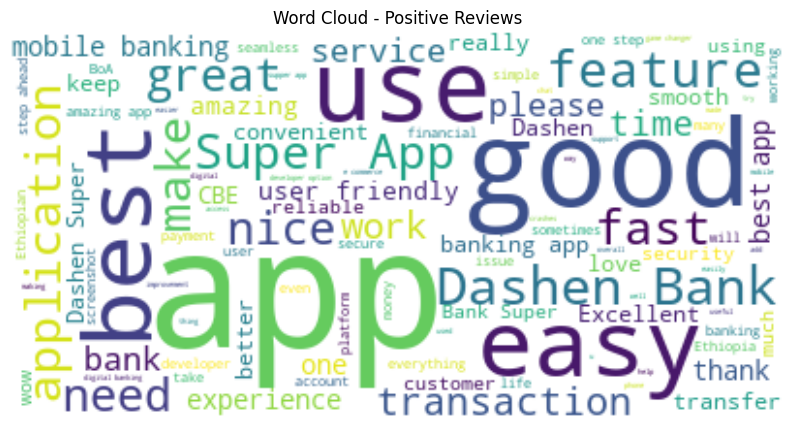

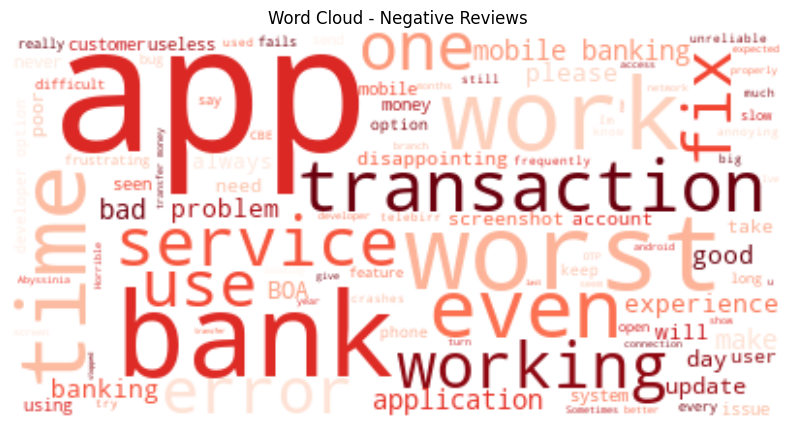

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd # Assuming df is a pandas DataFrame

# --- IMPORTANT: Replace 'your_review_column_name' with the actual column name ---
# You can uncomment the line below to inspect your DataFrame columns
# print(df.columns)

# Example: If your review text column is named 'customer_review'
# positive_text = " ".join(df[df['sentiment'] == 'positive']['customer_review'].dropna().tolist())
# negative_text = " ".join(df[df['sentiment'] == 'negative']['customer_review'].dropna().tolist())

# Prepare text - Using a placeholder for the actual column name
# Replace 'your_review_column_name' with the correct column name from your DataFrame
try:
    positive_text = " ".join(df[df['sentiment'] == 'positive']['review'].dropna().tolist())
    negative_text = " ".join(df[df['sentiment'] == 'negative']['review'].dropna().tolist())

    stopwords = set(STOPWORDS)

    # Positive word cloud
    wc_pos = WordCloud(stopwords=stopwords, background_color='white', max_words=100).generate(positive_text)
    plt.figure(figsize=(10,6))
    plt.imshow(wc_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Positive Reviews')
    plt.show()

    # Negative word cloud
    wc_neg = WordCloud(stopwords=stopwords, background_color='white', max_words=100, colormap='Reds').generate(negative_text)
    plt.figure(figsize=(10,6))
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Negative Reviews')
    plt.show()

except KeyError as e:
    print(f"Error: Column not found. Please check your DataFrame columns.")
    print(f"The missing column is: {e}")
    print(f"Available columns: {df.columns.tolist()}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


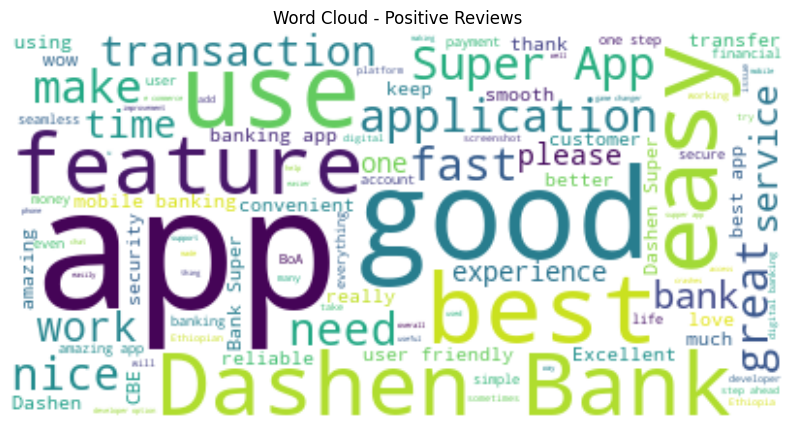

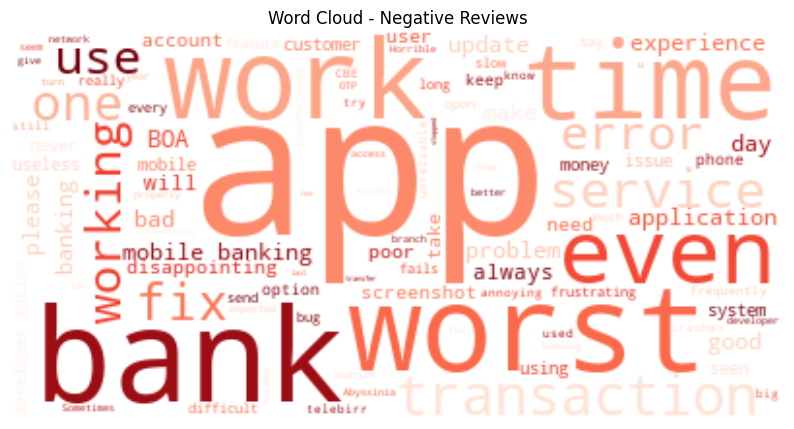

In [10]:
from wordcloud import WordCloud, STOPWORDS

# Prepare text
positive_text = " ".join(df[df['sentiment'] == 'positive']['review'].dropna().tolist())
negative_text = " ".join(df[df['sentiment'] == 'negative']['review'].dropna().tolist())

stopwords = set(STOPWORDS)

# Positive word cloud
wc_pos = WordCloud(stopwords=stopwords, background_color='white', max_words=100).generate(positive_text)
plt.figure(figsize=(10,6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

# Negative word cloud
wc_neg = WordCloud(stopwords=stopwords, background_color='white', max_words=100, colormap='Reds').generate(negative_text)
plt.figure(figsize=(10,6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()


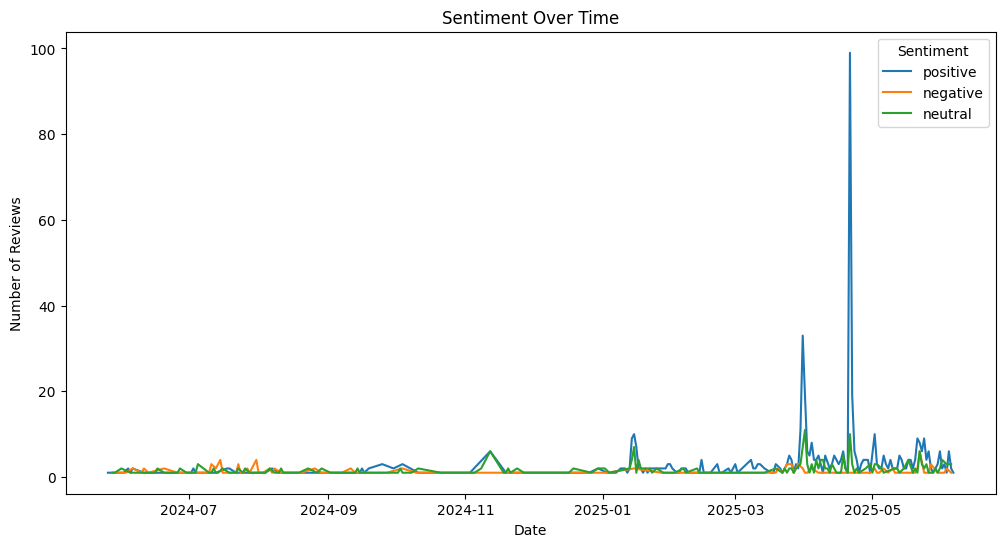

In [11]:
# Make sure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

sentiment_time = df.groupby(['date', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=sentiment_time, x='date', y='count', hue='sentiment')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


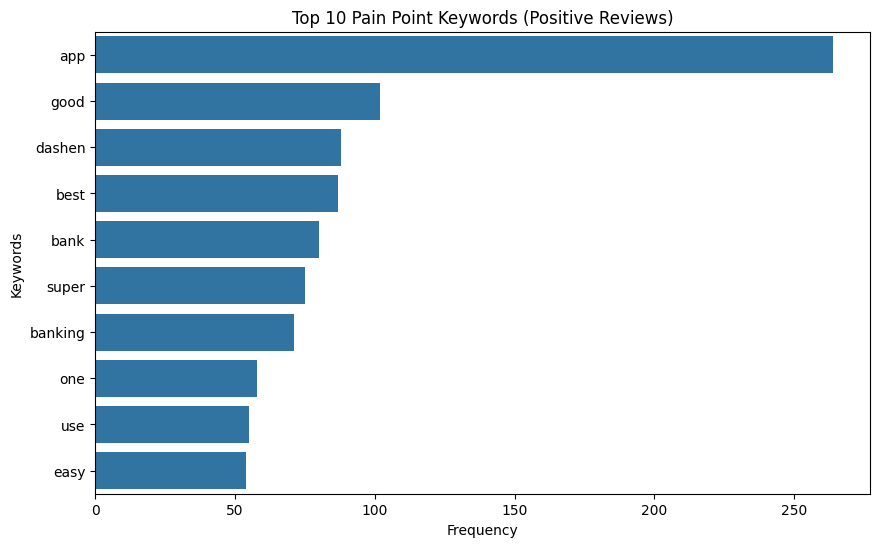

In [15]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not done
nltk.download('stopwords')

stop_words = set(stopwords.words('english')).union(set(string.punctuation))

# Combine all negative reviews
negative_reviews = df[df['sentiment'] == 'positive']['review'].dropna().str.lower()

# Tokenize
words = []
for review in negative_reviews:
    words.extend([word for word in review.split() if word not in stop_words and len(word) > 2])

# Count top 10 words
word_counts = Counter(words).most_common(10)
words, counts = zip(*word_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 10 Pain Point Keywords (Positive Reviews)')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()
